                                         FETCHING IMDB DETAILS USING OMDB API
                                                    MADE BY:
                                                    NITESH NIJHAWAN
                                                    DIVYANSH DIXIT

In [5]:

# Fetching data from imdb
import json
import urllib.request
from urllib.request import urlopen
# Displaying poster
from IPython.display import Image
# For coloured text
from IPython.core.display import HTML
from IPython.display import Markdown
# For clearing output after entering choice
from IPython.display import clear_output


#All magic happens here
def mainfn():
    movie_name = input("Simply enter the name of the movie:")
    name_list = movie_name.split()
    #Fetching results from omdb api
    response = urllib.request.urlopen('http://www.omdbapi.com/?apikey=408e2d44&s={}'.format('+'.join(name_list)))
    #Reading the json file
    x = json.loads(response.read())
    validity=check_validity(x)
    if validity == 1:
        user_choice=print_result(x)
        if user_choice != -1:
            return final_url(x['Search'][user_choice]['Poster'])
        else:
            return final_url('N/A')
# Checking if the entered movie is available        
def check_validity(data):
    if data['Response'] == 'False':
        print('Sorry, There is no result for your input!!\n Make sure the spelling is correct.')
        return 0
    else:
        return 1
    
    
# Print no. of movies found
def print_result(data):
    if int(data['totalResults']) == '1':
        specific_data=new_fn(data['Search'][0])
        print_net_info(specific_data)
        return 0
    else:
        (choice,limit)=print_options_get_choice(data)
        
        if choice>=1 and choice<=limit:
            specific_data=new_fn(data['Search'][choice-1])
            print_net_info(specific_data)
            return choice-1
        else:
            display (Markdown('<span style="color:rgb(0,0,255)font-size:25px"><b>INVALID INPUT!!</b></span>'))
            return -1
    
#Getting choice of mpvie from user        
def print_options_get_choice(data):
    sub_data=data['Search']
    for a in range(0,len(sub_data)):
        sub_sub_data=sub_data[a]
        print('press {}'.format(a+1))
        print('TITLE: {}'.format(sub_sub_data['Title']))
    choice = int(input("enter your choice here:"))
    return (choice,len(sub_data))

#Displaying the info fetched
def print_net_info(new_data):
    clear_output()
    #print('\n \n \n')
    display (Markdown('<span style="color:rgba(255,0,0,1); font-size:25px ;margin-left:auto;margin-right:auto"><b>Title:</b></span> '))
    print('{}'.format(new_data['Title']))
    display (Markdown('<span style="color:rgba(255,0,0,1); font-size:25px"><b>Year of release:</b></span>'))
    print('{}'.format(new_data['Year']))
    display (Markdown('<span style="color:rgba(255,0,0,1); font-size:25px"><b>Type of media:</b> </span>'))
    print('{}'.format(new_data['Type']))
    #print(new_data['imdbID'])
    display (Markdown('<span style="color:rgba(255,0,0,1); font-size:25px"><b>Writer :</b> </span>'))
    print('{}'.format(new_data['Genre']))
    display (Markdown('<span style="color:rgba(255,0,0,1); font-size:25px"><b>Director :</b> </span>'))
    print('{}'.format(new_data['Director']))
    display (Markdown('<span style="color:rgba(255,0,0,1); font-size:25px"><b>Actors :</b> </span>'))
    print('{}'.format(new_data['Actors']))
    display (Markdown('<span style="color:rgba(255,0,0,1); font-size:25px"><b>Synopsis :</b> </span>'))
    print('{}'.format(new_data['Plot']))

#In case of no poster diplay no picture image
def final_url(applicable):
    if applicable == 'N/A':
        return 'https://vignette.wikia.nocookie.net/dancewithdevils/images/3/38/NoPicture.jpeg'
    else:
        return applicable
        
#Fetching additional data from the omdb api
def new_fn(data_new):
    imdb_id=data_new['imdbID']
    response = urllib.request.urlopen('http://www.omdbapi.com/?apikey=408e2d44&i={}&plot=short'.format(imdb_id))
    y = json.loads(response.read())
    return y



<span style="color:rgba(255,0,0,1); font-size:25px ;margin-left:auto;margin-right:auto"><b>Title:</b></span> 

Airlift


<span style="color:rgba(255,0,0,1); font-size:25px"><b>Year of release:</b></span>

2016


<span style="color:rgba(255,0,0,1); font-size:25px"><b>Type of media:</b> </span>

movie


<span style="color:rgba(255,0,0,1); font-size:25px"><b>Writer :</b> </span>

Adventure, Drama, History


<span style="color:rgba(255,0,0,1); font-size:25px"><b>Director :</b> </span>

Raja Menon


<span style="color:rgba(255,0,0,1); font-size:25px"><b>Actors :</b> </span>

Akshay Kumar, Nimrat Kaur, Kumud Mishra, Prakash Belawadi


<span style="color:rgba(255,0,0,1); font-size:25px"><b>Synopsis :</b> </span>

When Iraq invades Kuwait in August, 1990, a callous Indian businessman becomes the spokesperson for more than 170,000 stranded countrymen.


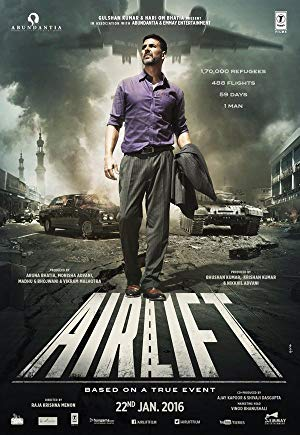

In [6]:
# Run this block to run the programme

Image(mainfn(),width=300, height=300)